# We aim to classify emails as either "Spam" or "Ham" (not spam). This is a binary classification problem where the target variable has two classes (Spam = 1, Ham = 0).

# Data Collection / cleaning

In [198]:
import sys
!"{sys.executable}" -m pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
#create dataframe
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [127]:
print(df.shape)
print(df.size)

(5572, 5)
27860


In [128]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='target'>

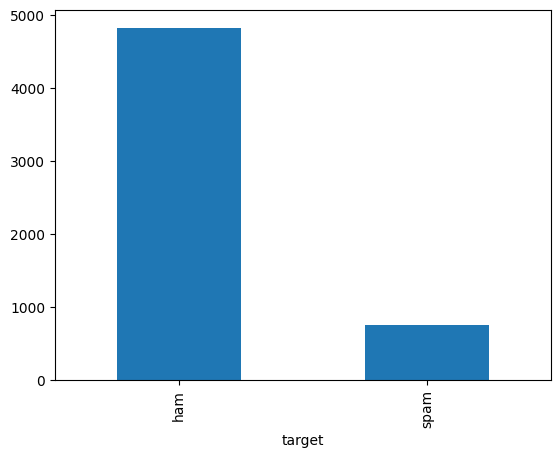

In [131]:
df['target'].value_counts().plot(kind = 'bar')

In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
df.isnull().sum() #check null values

target    0
text      0
dtype: int64

In [134]:
df.duplicated().sum() #check duplicate values

np.int64(403)

In [135]:
#drop duplicate values
df = df.drop_duplicates(keep = 'first')

In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.shape

(5169, 2)

# EDA

In [138]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

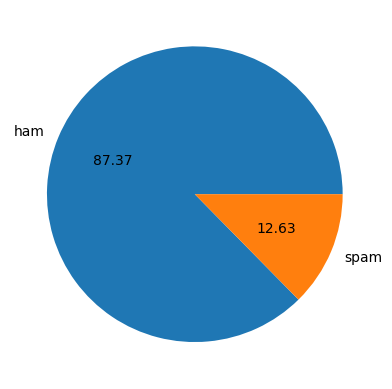

In [139]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [141]:
# import sys
# print(sys.executable)


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
#data is imbalenced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shuvadip
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

C:\Users\Shuvadip Pal\AppData\Local\Temp\ipykernel_13284\780254383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_characters'] = df['text'].apply(len)


In [145]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [146]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Shuvadip
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [147]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Shuvadip Pal\AppData\Local\Temp\ipykernel_13284\4128989944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [148]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [149]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Shuvadip Pal\AppData\Local\Temp\ipykernel_13284\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [151]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

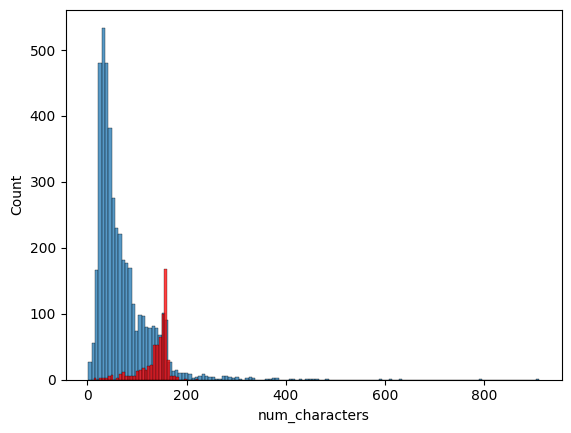

In [154]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

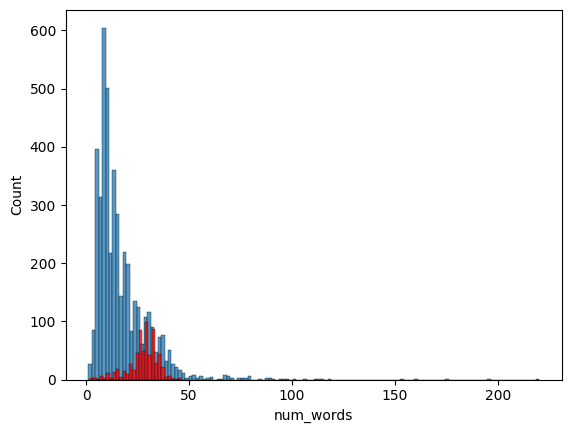

In [155]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

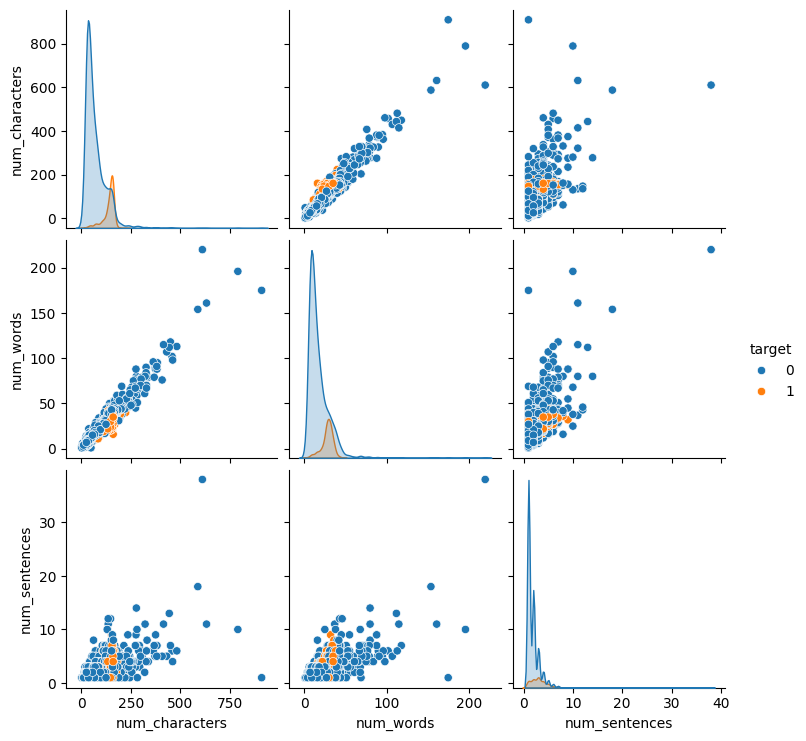

In [156]:
sns.pairplot(df,hue='target')

<Axes: >

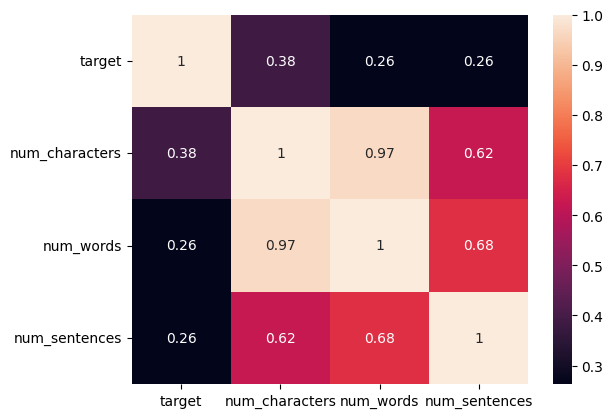

In [157]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

# Data Preprocessing
 1. lower case
 2. Tokenization
 3. Removing special Characters
 4. Removing stop words and punctuation
 5. Stemming

In [158]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re

# Text preprocessing function (remove punctuation, lowercase, etc.)
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    #Tokenization
    text = nltk.word_tokenize(text)
    #changing sentence form
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    # Optionally
    return text
# Apply preprocessing to the text data
df['transformed_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to C:\Users\Shuvadip
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Shuvadip Pal\AppData\Local\Temp\ipykernel_13284\732036178.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(preprocess_text)


In [159]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, dont, think, goe, usf, live, around, tho..."


In [160]:
!"{sys.executable}" -m pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

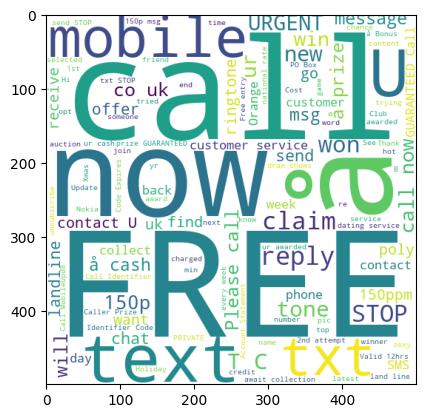

In [162]:
plt.imshow(spam_wc)

In [163]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

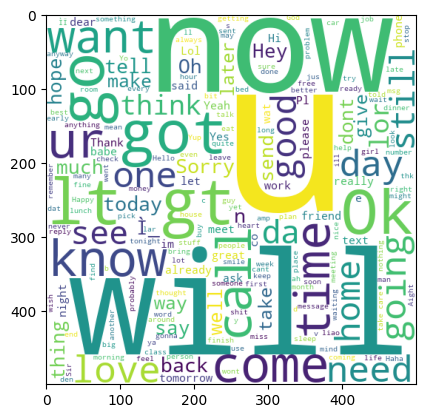

In [164]:
plt.imshow(ham_wc)

In [165]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  if isinstance(msg, str): # Check if msg is a string
    for word in msg.split():
      spam_corpus.append(word)
  elif isinstance(msg, list): # Check if msg is a list
    for word in msg:
      spam_corpus.append(word)

In [166]:
len(spam_corpus)

9431

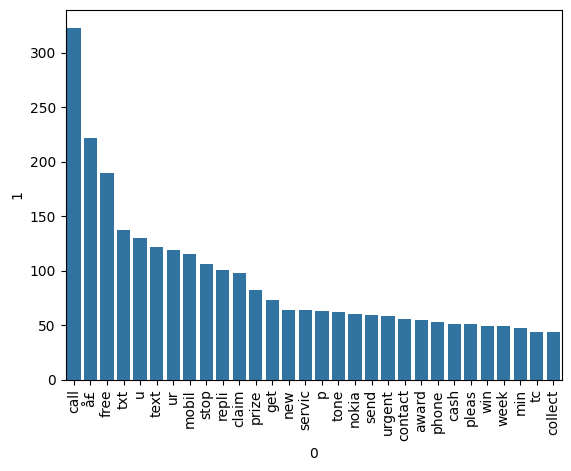

In [167]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [168]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  if isinstance(msg, str): # Check if msg is a string
    for word in msg.split():
      ham_corpus.append(word)
  elif isinstance(msg, list): # Check if msg is a list
    for word in msg:
      ham_corpus.append(word)

In [169]:
len(ham_corpus)

35906

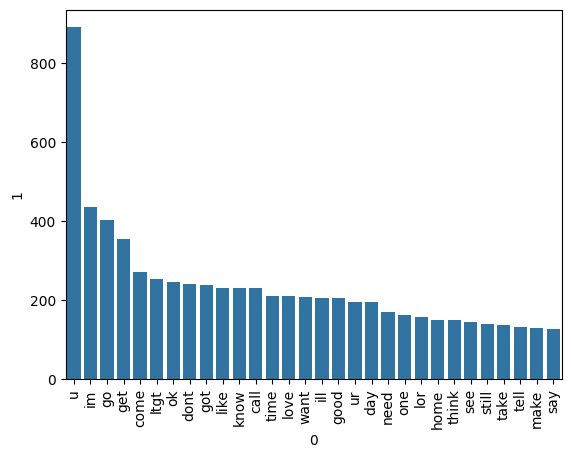

In [170]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#Model building

In [171]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))

X = cv.fit_transform(df['transformed_text']).toarray()

C:\Users\Shuvadip Pal\AppData\Local\Temp\ipykernel_13284\725467671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))


In [172]:
X.shape

(5169, 7083)

In [173]:
y = df['target'].values

In [174]:
y

array([0, 0, 1, ..., 0, 0, 0])

Applied count Vectorizer

In [175]:
X.shape

(5169, 7083)

In [176]:
Y = df['target'].values

In [177]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [178]:
#5. train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(X_train,Y_train)

GaussianNB()

In [181]:
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8704061895551257
[[784 112]
 [ 22 116]]
0.5087719298245614


In [182]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9555125725338491
[[864  32]
 [ 14 124]]
0.7948717948717948


In [183]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9690522243713733
[[890   6]
 [ 26 112]]
0.9491525423728814


Apply tfidfvectorizer

In [184]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [185]:
x.shape

(5169, 3000)

In [186]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [188]:
gnb.fit(x_train,y_train)

GaussianNB()

In [189]:
Y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,Y_pred1))
print(confusion_matrix(y_test,Y_pred1))
print(precision_score(y_test,Y_pred1))

0.8665377176015474
[[785 111]
 [ 27 111]]
0.5


In [190]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [191]:
Y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,Y_pred2))
print(confusion_matrix(y_test,Y_pred2))
print(precision_score(y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [192]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [193]:
Y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,Y_pred3))
print(confusion_matrix(y_test,Y_pred3))
print(precision_score(y_test,Y_pred3))

0.9806576402321083
[[895   1]
 [ 19 119]]
0.9916666666666667


Choosed tfidf naive base --> mnb


In [205]:
!"{sys.executable}" -m pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [207]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [208]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
}

In [209]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score # Make sure precision_score is imported correctly

def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred) # Call the precision_score function

  return accuracy,precision

accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: C:\Users\Shuvadip Pal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8446601941747572
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


C:\Users\Shuvadip Pal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9439252336448598
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.890625
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9658119658119658
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93


In [210]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [211]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
8,ETC,0.971954,0.965812
0,SVC,0.969052,0.956897
4,LR,0.956480,0.951456
6,AdaBoost,0.958414,0.943925
9,GBDT,0.949710,0.930000
7,BgC,0.963250,0.890625
3,DT,0.935203,0.844660


In [212]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.971954
4,SVC,Accuracy,0.969052
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.958414
7,GBDT,Accuracy,0.949710
8,BgC,Accuracy,0.963250
9,DT,Accuracy,0.935203


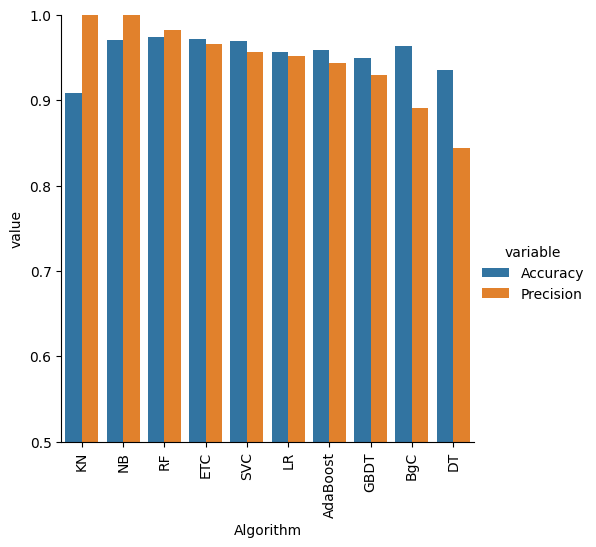

In [213]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [220]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.908124,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
8,ETC,0.971954,0.965812
0,SVC,0.969052,0.956897
4,LR,0.956480,0.951456
6,AdaBoost,0.958414,0.943925
9,GBDT,0.949710,0.930000
7,BgC,0.963250,0.890625
3,DT,0.935203,0.844660


In [221]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.908124,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
8,ETC,0.971954,0.965812
0,SVC,0.969052,0.956897
4,LR,0.956480,0.951456
6,AdaBoost,0.958414,0.943925
9,GBDT,0.949710,0.930000
7,BgC,0.963250,0.890625
3,DT,0.935203,0.844660


In [222]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.908124,1.000000,0.908124,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,ETC,0.971954,0.965812,0.971954,0.965812
4,SVC,0.969052,0.956897,0.969052,0.956897
5,LR,0.956480,0.951456,0.956480,0.951456
6,AdaBoost,0.958414,0.943925,0.958414,0.943925
7,GBDT,0.949710,0.930000,0.949710,0.930000
8,BgC,0.963250,0.890625,0.963250,0.890625
9,DT,0.935203,0.844660,0.935203,0.844660


In [223]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812
4,SVC,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897
5,LR,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,AdaBoost,0.958414,0.943925,0.958414,0.943925,0.958414,0.943925
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625
9,DT,0.935203,0.844660,0.935203,0.844660,0.935203,0.844660


In [224]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.908124,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
8,ETC,0.971954,0.965812
0,SVC,0.969052,0.956897
4,LR,0.956480,0.951456
6,AdaBoost,0.958414,0.943925
9,GBDT,0.949710,0.930000
7,BgC,0.963250,0.890625
3,DT,0.935203,0.844660


In [225]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812
4,SVC,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897,0.969052,0.956897
5,LR,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,AdaBoost,0.958414,0.943925,0.958414,0.943925,0.958414,0.943925,0.958414,0.943925
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625,0.963250,0.890625
9,DT,0.935203,0.844660,0.935203,0.844660,0.935203,0.844660,0.935203,0.844660


In [226]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [227]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [228]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [229]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9523809523809523


In [230]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [231]:
from sklearn.ensemble import StackingClassifier

In [232]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [233]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9461538461538461


In [238]:
import pandas as pd
import string
import re
import nltk
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Text preprocessing
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = nltk.word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Load your dataset
df = pd.read_csv('spam.csv', encoding='latin-1')  # Use your actual dataset
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preprocess
df['transformed_text'] = df['text'].apply(preprocess_text)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF and model
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

print("✅ Model and vectorizer saved successfully.")


[nltk_data] Downloading package stopwords to C:\Users\Shuvadip
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shuvadip
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Model and vectorizer saved successfully.


In [235]:
#project
!pip install streamlit

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: C:\Users\Shuvadip Pal\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [ ]:
#password is external url number part except last 4 port number and :

